Importing libraries

In [37]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt

Reading CSV from Github

In [38]:
vehicles = pd.read_csv("https://raw.githubusercontent.com/Ali7109/3401Project/trimmed-dataset/src/vehicles_trimmed.csv")
vehicles_backup = vehicles

In [39]:
vehicles.shape

(426880, 23)

Keeping the top 40 car models to avoid irregular naming/spelling and formatting errors. 

In [40]:
# at about the top 40 models the naming stops being regular
# sort models by top
model_count = vehicles['model'].value_counts()
print(model_count[:40])

model
f-150               8009
silverado 1500      5140
1500                4211
camry               3135
silverado           3023
accord              2969
wrangler            2848
civic               2799
altima              2779
escape              2746
2500                2687
tacoma              2582
explorer            2499
grand cherokee      2489
corolla             2241
mustang             2225
fusion              1979
equinox             1972
cr-v                1930
focus               1832
malibu              1764
tahoe               1729
charger             1719
corvette            1711
rav4                1701
sonata              1686
impala              1682
sierra 1500         1658
grand caravan       1601
cruze               1559
outback             1551
silverado 2500hd    1545
f-250               1529
elantra             1498
odyssey             1494
3500                1491
edge                1471
prius               1435
tundra              1425
jetta              

In [41]:
# Take the top 40 models and put it into a list to be used for comparison
sorted_models = dict(model_count).keys()
sorted_models = list(sorted_models)
sorted_models = sorted_models[:75]
print(sorted_models)

['f-150', 'silverado 1500', '1500', 'camry', 'silverado', 'accord', 'wrangler', 'civic', 'altima', 'escape', '2500', 'tacoma', 'explorer', 'grand cherokee', 'corolla', 'mustang', 'fusion', 'equinox', 'cr-v', 'focus', 'malibu', 'tahoe', 'charger', 'corvette', 'rav4', 'sonata', 'impala', 'sierra 1500', 'grand caravan', 'cruze', 'outback', 'silverado 2500hd', 'f-250', 'elantra', 'odyssey', '3500', 'edge', 'prius', 'tundra', 'jetta', 'rogue', 'forester', 'sentra', 'sierra', 'wrangler unlimited', 'camaro', 'soul', 'pilot', 'c-class', 'sienna', 'f-350', 'f150', 'cherokee', '4runner', 'highlander', 'suburban', 'expedition', 'traverse', 'impreza', 'optima', 'challenger', 'acadia', '3 series', 'sierra 2500hd', 'e-class', 'yukon', 'x5', 'santa fe', 'taurus', '200', 'ranger', 'terrain', 'colorado', 'durango', 'f250', 'mdx', 'sorento', 'journey', 'escalade', 'enclave', 'passat', 'maxima', 'pathfinder', 'liberty', 'town & country', 'a4', 'versa', 'murano', '300', '5 series', 'patriot', 'fusion se',

In [42]:
# Goes through the entire model column and check if that value is in the top40 list from above, if it is keep it, else we replace the value with null
# so it can be dropped later
vehicles['model'] = vehicles['model'].apply(lambda carModel : carModel if str(carModel) in sorted_models else np.nan)

Remove un-needed columns

In [43]:
vehicles = vehicles.drop(['id','region_url', 'condition', 'VIN', 'drive', 'size', 'county', 'posting_date'], axis=1)

In [44]:
vehicles = vehicles.drop(['type', 'paint_color', 'cylinders'], axis=1)

In [45]:
# see how much data is missing and then just drop it.
print(vehicles.isna().sum() / vehicles.shape[0] * 100)
vehicles = vehicles.dropna()

region           0.000000
price            0.000000
year             0.282281
manufacturer     4.133714
model           66.135916
fuel             0.705819
odometer         1.030735
title_status     1.930753
transmission     0.598763
state            0.000000
lat              1.534155
long             1.534155
dtype: float64


In [46]:
vehicles.shape

(137306, 12)

In [47]:
# see what the data looks like at this point
vehicles.sample(10)

,region,price,year,manufacturer,model,fuel,odometer,title_status,transmission,state,lat,long
253839,north jersey,6999,2005.0,ford,f-150,gas,182796.0,clean,automatic,nj,40.862572,-74.096558
24823,chico,13995,2011.0,toyota,camry,gas,62835.0,clean,automatic,ca,39.721857,-121.827227
423510,milwaukee,18500,2014.0,mercedes-benz,e-class,gas,86376.0,clean,automatic,wi,42.364188,-87.864796
265394,albany,9850,2012.0,chrysler,town & country,gas,138000.0,clean,automatic,ny,42.852400,-73.870100
320784,medford-ashland,15998,2013.0,jeep,grand cherokee,gas,92991.0,clean,other,or,42.378530,-122.857520
400343,bellingham,37999,2015.0,jeep,wrangler unlimited,gas,97606.0,clean,automatic,wa,47.199100,-122.315100
298959,dayton / springfield,9998,2012.0,honda,accord,gas,133024.0,clean,automatic,oh,39.651352,-84.222938
119663,treasure coast,12500,2012.0,chrysler,town & country,gas,72000.0,clean,automatic,fl,27.381340,-80.329800
149659,"st louis, MO",12495,2013.0,ford,fusion,gas,71157.0,clean,automatic,il,38.594300,-90.230900
385246,wichita falls,15988,2016.0,toyota,camry,gas,64404.0,clean,automatic,tx,35.199000,-97.484100


### Remove any "extreme values" from the dataset
* i.e. any 'free cars' (ones that are listed as free but would say call for price, etc.)
* and just any cars that somehow hit a million miles

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
# Remove all "free" cars
vehicles= vehicles[vehicles['price'] != 0.0]

In [50]:
# Remove the extremes from the prices (remove the $1 cars, and some of the cars that go over a million)
lowerPricePercentile = np.percentile(vehicles['price'], 3)
upperPricePercentile = np.percentile(vehicles['price'], 99)
print(lowerPricePercentile, upperPricePercentile)
vehicles = vehicles[vehicles['price'].between(lowerPricePercentile, upperPricePercentile)]

500.0 62995.0


In [51]:
# remove extremes from the odometer (really low mileage (maybe typo or just doesn't care), and the million mile cars)
lowerOdometerPercentile = np.percentile(vehicles['odometer'], 2)
upperUpperPercentile = np.percentile(vehicles['odometer'], 99)
print(lowerOdometerPercentile, upperUpperPercentile)
vehicles = vehicles[vehicles['odometer'].between(lowerOdometerPercentile, upperUpperPercentile)]

4642.4400000000005 275000.0


In [52]:
# final shape
vehicles.shape

(116997, 12)

## Plotting what we have now

array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'year'}>],
       [<Axes: title={'center': 'odometer'}>,
        <Axes: title={'center': 'lat'}>],
       [<Axes: title={'center': 'long'}>, <Axes: >]], dtype=object)

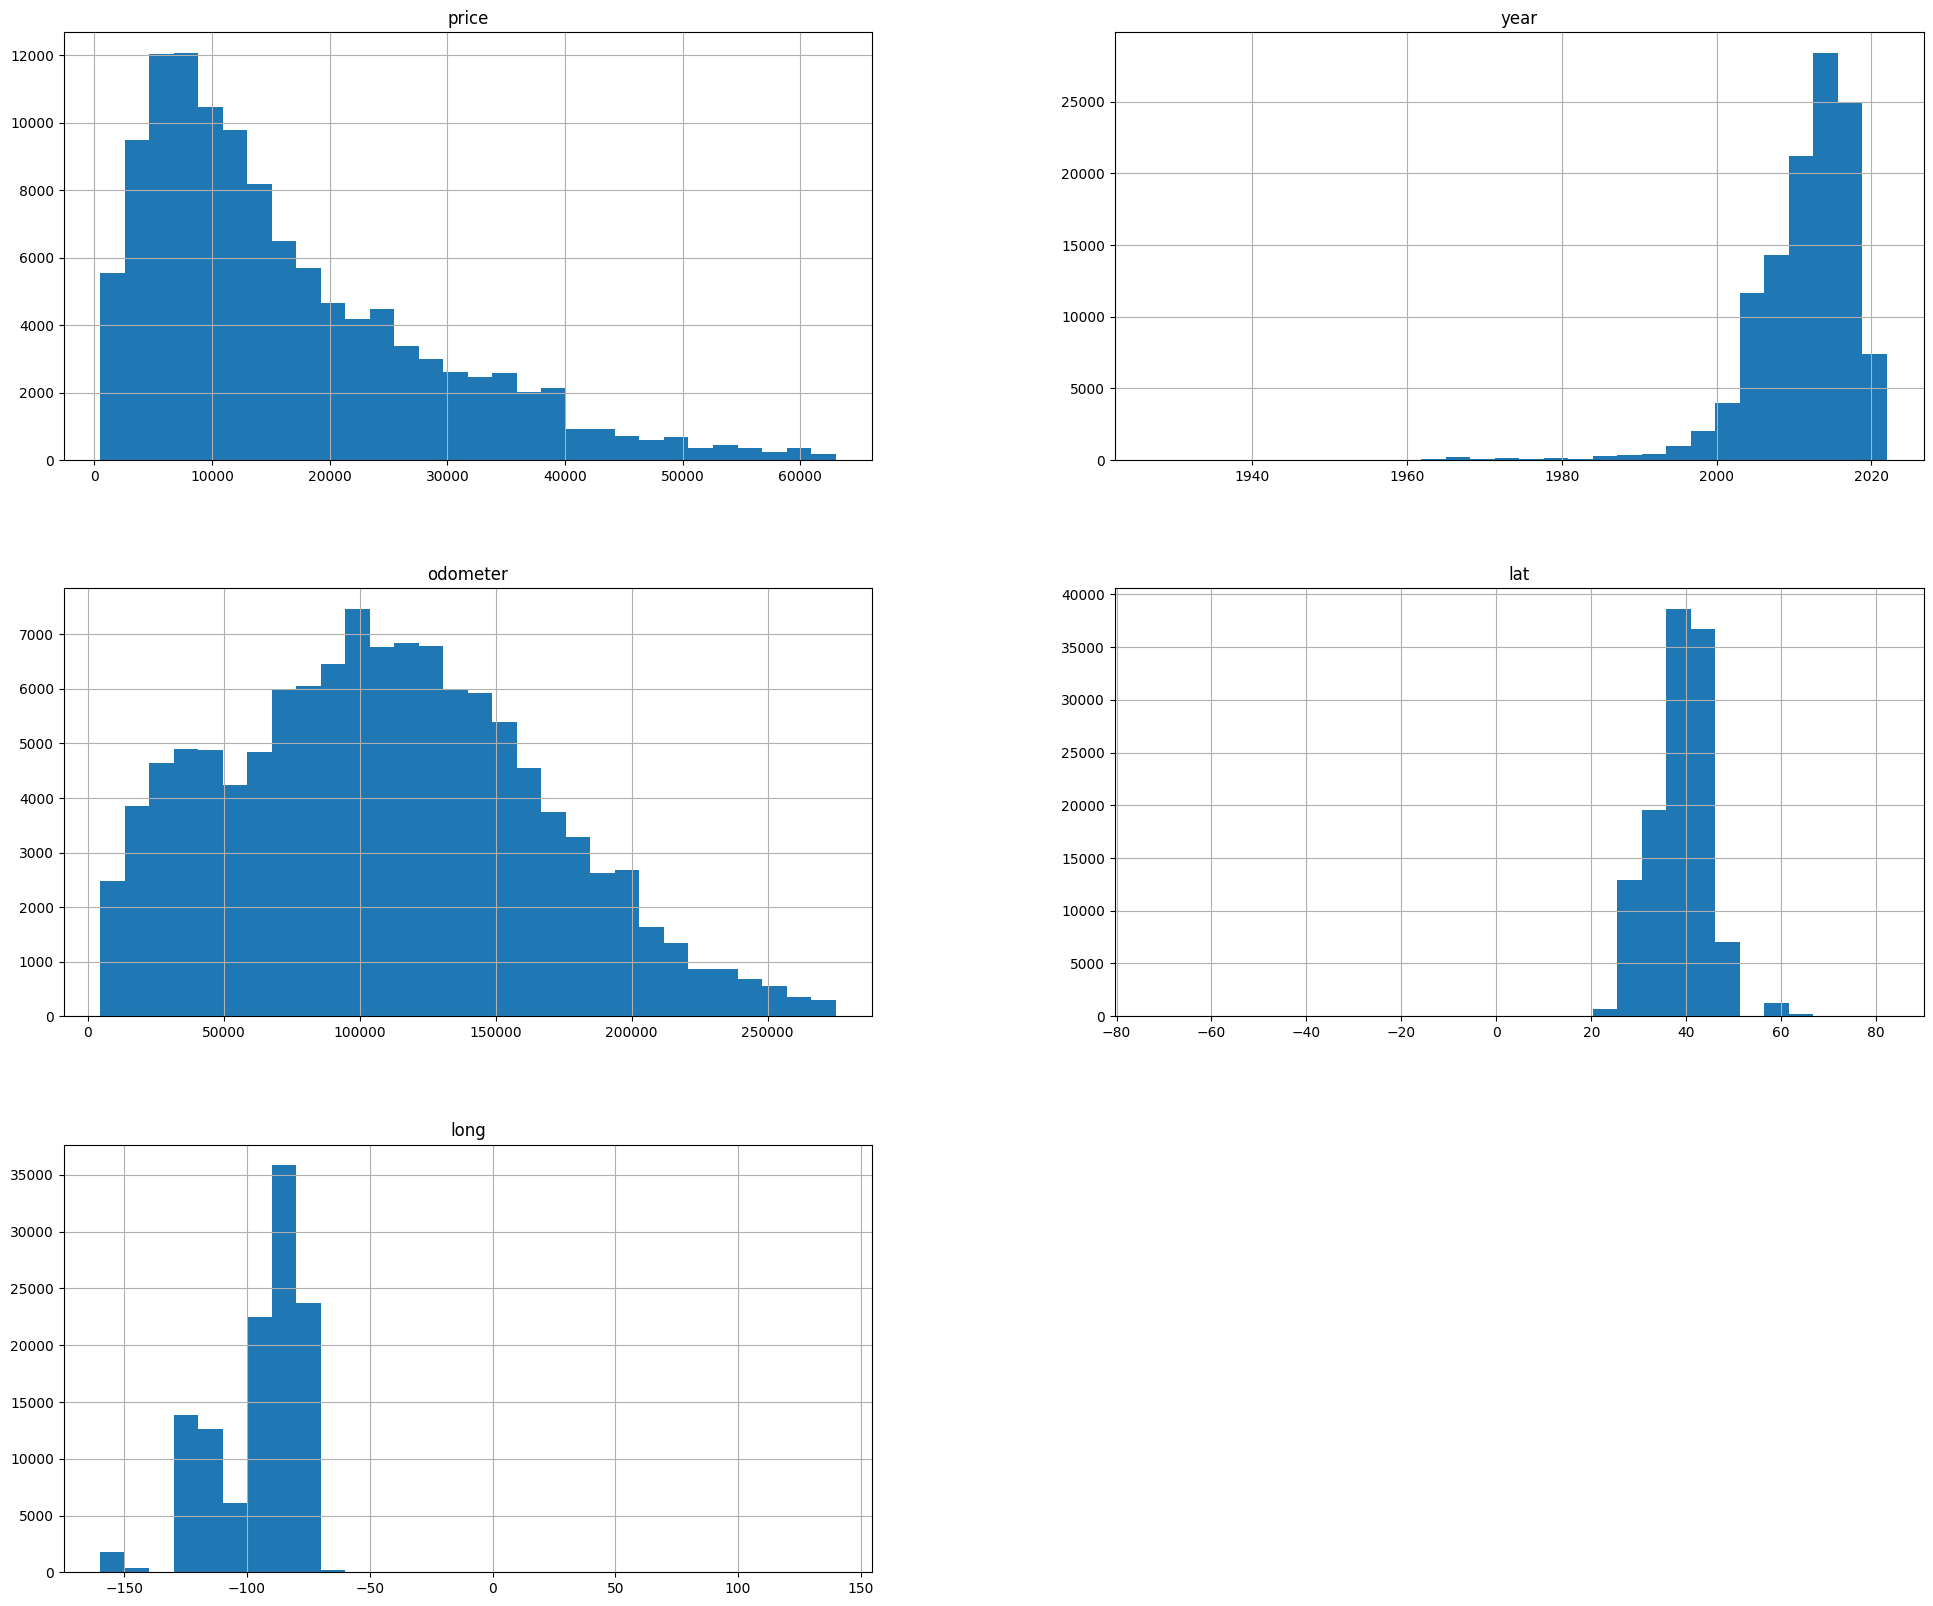

In [53]:
vehicles.hist(figsize=(24,20), bins=30)

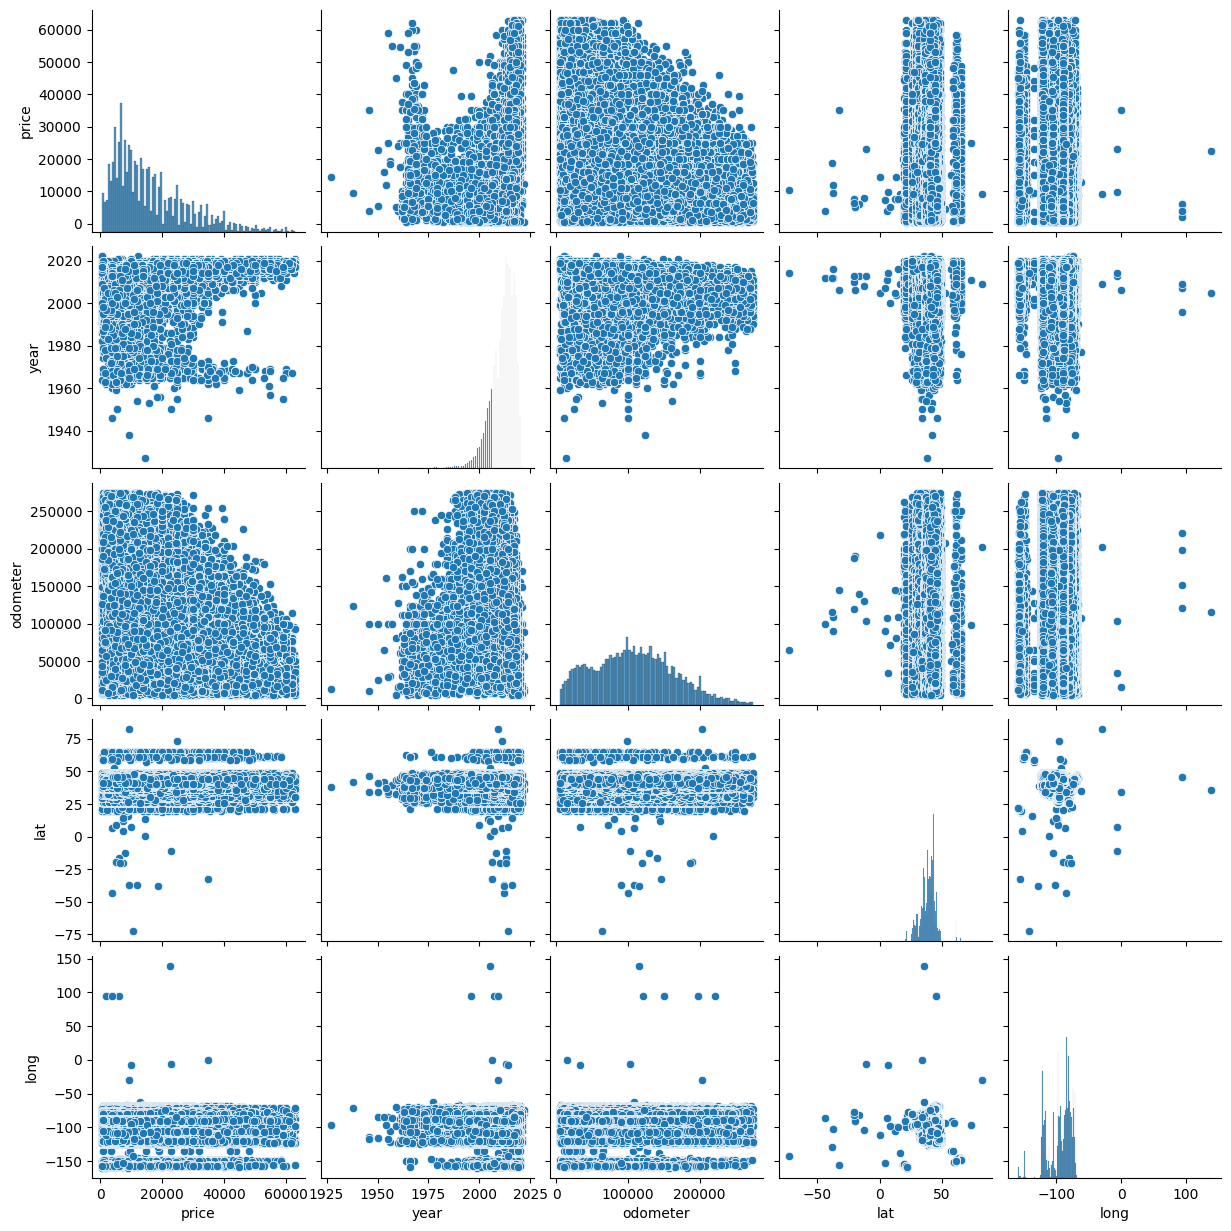

In [54]:
sns.pairplot(vehicles)

In [55]:
vehicles['manufacturer'].value_counts()

manufacturer
ford             23344
chevrolet        20052
toyota           13125
honda             8835
jeep              7967
nissan            7287
ram               7005
gmc               5296
dodge             4454
subaru            3955
hyundai           3294
kia               2288
bmw               2152
chrysler          1863
volkswagen        1781
mercedes-benz     1280
cadillac          1163
acura              641
buick              620
audi               595
Name: count, dtype: int64

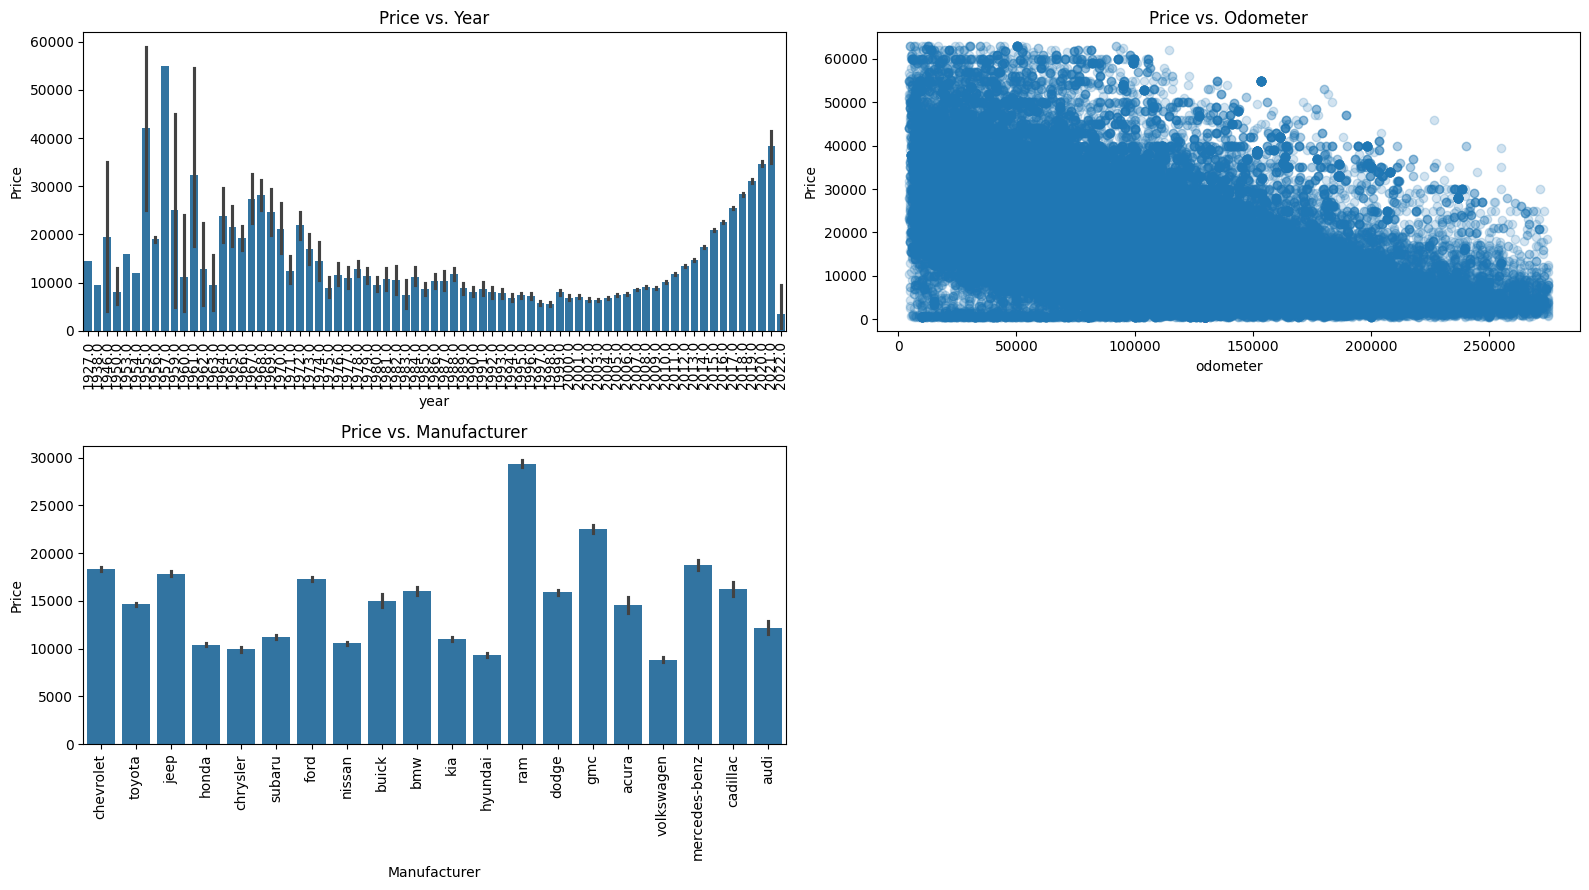

In [56]:
plt.figure(figsize=(16,9))

# Plot Price vs. Odometer
plt.subplot(2,2,1)
sns.barplot(vehicles, x='year', y='price') # seaborn plots the mean so it's a little easier to use
plt.xticks(rotation = 90)
plt.xlabel("year")
plt.ylabel("Price")
plt.title("Price vs. Year")

# Plot Price vs. odometer
plt.subplot(2,2,2)
plt.scatter(x=vehicles['odometer'], y=vehicles['price'], alpha=0.2)
plt.xlabel("odometer")
plt.ylabel("Price")
plt.title("Price vs. Odometer")

plt.subplot(2,2,3)
#plt.bar(vehicles['manufacturer'], vehicles['price'])
sns.barplot(vehicles, x='manufacturer', y='price')
plt.xticks(rotation = 90)
plt.xlabel('Manufacturer')
plt.ylabel('Price')
plt.title('Price vs. Manufacturer')

# tight layout fixes the overlapping labels
plt.tight_layout()
plt.show()

### Splitting and Training Data

In [57]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [58]:
# Create the cat and num columns
# Get a list of column names from the DataFrame that are of numerical data types.
# Get a list of column names from the DataFrame that are not of numerical data types.

num_cols = vehicles.select_dtypes(include='number').columns.to_list()
cat_cols = vehicles.select_dtypes(exclude='number').columns.to_list()


# Exclude the target from numerical columns
num_cols.remove('price')

# Create pipelines for numeric and categorical columns
num_pipeline = make_pipeline(StandardScaler())
cat_pipeline = make_pipeline(OneHotEncoder(sparse_output=False))

# Use ColumnTransformer to set the estimators and transformations
preprocessing = ColumnTransformer([('num', num_pipeline, num_cols),
                                   ('cat', cat_pipeline, cat_cols)],
                                   remainder='passthrough'
                                 )

preprocessing

ColumnTransformer(remainder='passthrough',
                  transformers=[('num',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler())]),
                                 ['year', 'odometer', 'lat', 'long']),
                                ('cat',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(sparse_output=False))]),
                                 ['region', 'manufacturer', 'model', 'fuel',
                                  'title_status', 'transmission', 'state'])])

In [59]:
num_cols

['year', 'odometer', 'lat', 'long']

In [60]:
cat_cols

['region',
 'manufacturer',
 'model',
 'fuel',
 'title_status',
 'transmission',
 'state']

In [61]:
# Apply the preprocessing pipeline on the dataset
vehicles_prepared = preprocessing.fit_transform(vehicles)


In [62]:

# # Scikit-learn strips the column headers, so just add them back on afterward.
feature_names=preprocessing.get_feature_names_out()
#vehicles_prepared.shape
vehicles_prepared = pd.DataFrame(data=vehicles_prepared, columns=feature_names)
vehicles_prepared.shape

(116997, 593)

In [63]:
vehicles_prepared.columns

Index(['num__year', 'num__odometer', 'num__lat', 'num__long',
       'cat__region_SF bay area', 'cat__region_abilene',
       'cat__region_akron / canton', 'cat__region_albany',
       'cat__region_albuquerque', 'cat__region_altoona-johnstown',
       ...
       'cat__state_tn', 'cat__state_tx', 'cat__state_ut', 'cat__state_va',
       'cat__state_vt', 'cat__state_wa', 'cat__state_wi', 'cat__state_wv',
       'cat__state_wy', 'remainder__price'],
      dtype='object', length=593)

# TRAINING

## Splitting

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
X = vehicles_prepared.drop(["remainder__price"], axis=1)
y = vehicles_prepared['remainder__price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(93597, 592) (93597,) (23400, 592) (23400,)


## Linear Regression 

In [66]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()

lr_model.fit(X_train.iloc[:10000],y_train.iloc[:10000])
# # lr_model.fit(X_train,y_train)


LinearRegression()

In [67]:
# Predict the outcome of test data

lr_y_predict = lr_model.predict(X_test)

from sklearn.metrics import mean_squared_error as mse
lr_mse=mse(y_test, lr_y_predict)
lr_mse

2.6537047771835816e+27

## Random Forest Regression

In [68]:

from sklearn.ensemble import RandomForestRegressor

#Initalization
forest_model = RandomForestRegressor()

#Training
forest_model.fit(X_train.iloc[:10000],y_train.iloc[:10000])

RandomForestRegressor()

In [69]:
# Predict prices using the trained Random Forest model
predicted_prices_forest = forest_model.predict(X_test)
from sklearn.metrics import mean_squared_error, r2_score

# Calculate Mean Squared Error for the Random Forest model
mse_forest = mean_squared_error(y_test, predicted_prices_forest)

# Calculate R-squared for the Random Forest model
r2_forest = r2_score(y_test, predicted_prices_forest)

print(f"Random Forest - Mean Squared Error: {mse_forest}")
print(f"Random Forest - R-squared: {r2_forest}")


Random Forest - Mean Squared Error: 25892501.69111808
Random Forest - R-squared: 0.8254055143343693


## Gradient Boosting Regression

In [70]:
from sklearn.ensemble import GradientBoostingRegressor

#Initalization
gradient_boosting_model = GradientBoostingRegressor()

#Training 
gradient_boosting_model.fit(X_train.iloc[:10000],y_train.iloc[:10000])

GradientBoostingRegressor()

In [71]:
# Predict prices using the trained Gradient Boosting model
predicted_prices_gradient_boosting = gradient_boosting_model.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score

# Calculate Mean Squared Error for the Gradient Boosting model
mse_gradient_boosting = mean_squared_error(y_test, predicted_prices_gradient_boosting)

# Calculate R-squared for the Gradient Boosting model
r2_gradient_boosting = r2_score(y_test, predicted_prices_gradient_boosting)

print(f"Gradient Boosting - Mean Squared Error: {mse_gradient_boosting}")
print(f"Gradient Boosting - R-squared: {r2_gradient_boosting}")

Gradient Boosting - Mean Squared Error: 38306617.086447835
Gradient Boosting - R-squared: 0.7416964885207344


## Stacking Regression

In [72]:
from sklearn.ensemble import StackingRegressor

# Define base models
base_models = [
    ('RandomForest', RandomForestRegressor()),
    ('GradientBoosting', GradientBoostingRegressor())
]

# Initialize the Stacking Regressor
stacked_model = StackingRegressor(
    estimators=base_models,
    final_estimator=LinearRegression()  # Meta-estimator to combine the base models' predictions
)

# Train the Stacked model on the training data
stacked_model.fit(X_train.iloc[:10000], y_train.iloc[:10000])


StackingRegressor(estimators=[('RandomForest', RandomForestRegressor()),
                              ('GradientBoosting',
                               GradientBoostingRegressor())],
                  final_estimator=LinearRegression())

In [73]:
# Predict prices using the trained Stacked model
predicted_prices_stacked = stacked_model.predict(X_test)

In [74]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate Mean Squared Error for the Stacked model
mse_stacked = mean_squared_error(y_test, predicted_prices_stacked)

# Calculate R-squared for the Stacked model
r2_stacked = r2_score(y_test, predicted_prices_stacked)

print(f"Stacked Model - Mean Squared Error: {mse_stacked}")
print(f"Stacked Model - R-squared: {r2_stacked}")

Stacked Model - Mean Squared Error: 25768408.736995757
Stacked Model - R-squared: 0.8262422795785382


# Plot Scatter for Linear Regression

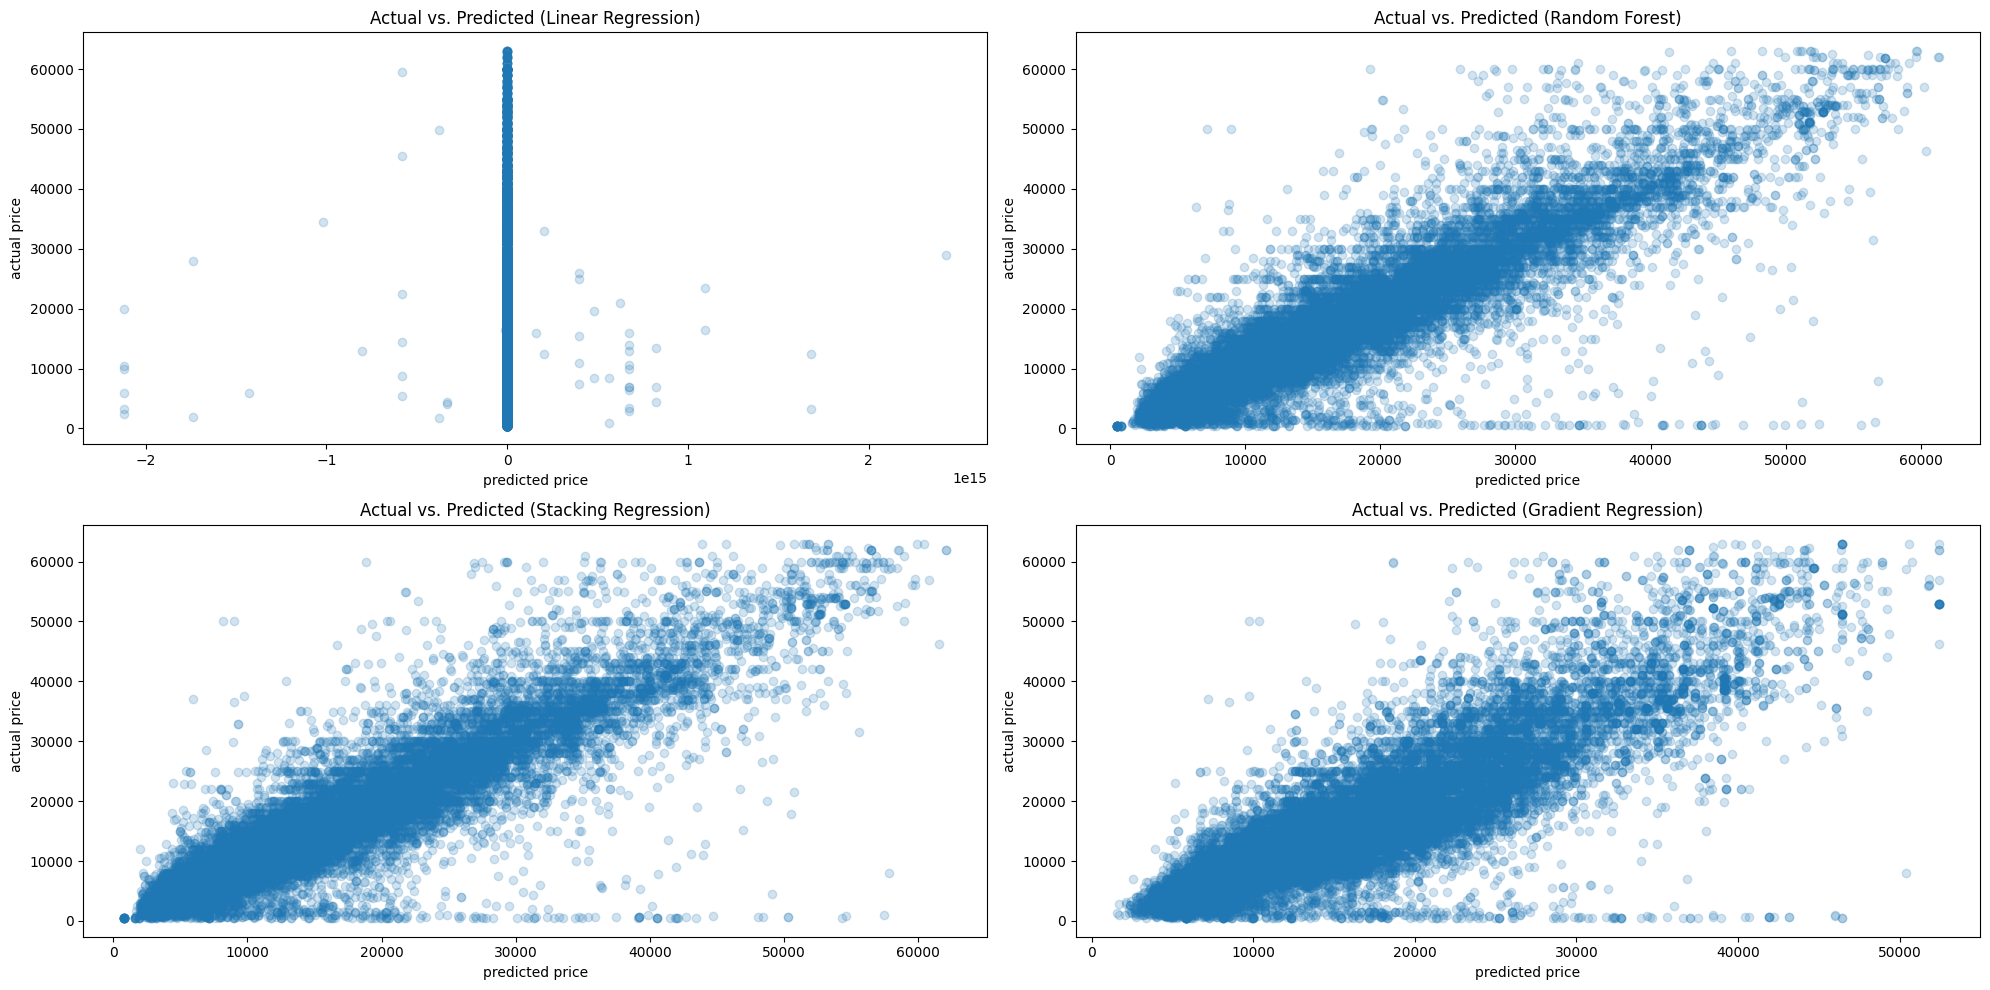

In [75]:
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
plt.scatter(lr_y_predict, y_test, alpha=0.2)
plt.xlabel("predicted price")
plt.ylabel("actual price")
plt.title("Actual vs. Predicted (Linear Regression)")

plt.subplot(2,2,2)
plt.scatter(predicted_prices_forest, y_test, alpha=0.2)
plt.xlabel("predicted price")
plt.ylabel("actual price")
plt.title("Actual vs. Predicted (Random Forest)")
plt.subplot(2,2,3)
plt.scatter(predicted_prices_stacked, y_test, alpha=0.2)
plt.xlabel("predicted price")
plt.ylabel("actual price")
plt.title("Actual vs. Predicted (Stacking Regression)")
plt.subplot(2,2,4)
plt.scatter(predicted_prices_gradient_boosting, y_test, alpha=0.2)
plt.xlabel("predicted price")
plt.ylabel("actual price")
plt.title("Actual vs. Predicted (Gradient Regression)")
plt.tight_layout()
plt.show()